
# Faces recognition using Spectral Embedding and SVMs


The dataset used in this example is a preprocessed excerpt of the
"Labeled Faces in the Wild", aka LFW_:

  http://vis-www.cs.umass.edu/lfw/lfw-funneled.tgz (233MB)

  LFW: http://vis-www.cs.umass.edu/lfw/


In [1]:
%matplotlib inline
from time import time
import logging
import matplotlib.pyplot as plt

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn import manifold

print(__doc__)

# Display progress logs on stdout
logging.basicConfig(level=logging.INFO, format='%(asctime)s %(message)s')

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

2017-03-17 21:53:54,278 Loading LFW people faces from /home/chandu/scikit_learn_data/lfw_home


Automatically created module for IPython interactive environment
Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


In [2]:
accuracies = []
components = []
for nn in xrange(2,30,2):
    n_neighbors = nn+1
    n_components = nn
    isp = manifold.Isomap(n_neighbors, n_components)

    X_train_changed = isp.fit_transform(X_train)
    X_test_changed = isp.fit_transform(X_test)
    param_grid = {'C': [1,1e1,1e2,5e2,1e3, 5e3, 1e4, 5e4, 1e5],
                          'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
    clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
    clf = clf.fit(X_train_changed, y_train)
    y_pred = clf.predict(X_test_changed)
    accuracies.append(float(np.sum(y_test==y_pred))/len(y_pred))
    components.append(n_components)
    print('For '+str(n_components)+' components, accuracy is '+str(float(np.sum(y_test==y_pred))/len(y_pred))+' confusion matrix is: ')
    print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))
    print(classification_report(y_test, y_pred, target_names=target_names))

For 2 components, accuracy is 0.453416149068 confusion matrix is: 
[[  0   0   0  13   0   0   0]
 [  0   0   0  60   0   0   0]
 [  0   0   0  27   0   0   0]
 [  0   0   0 146   0   0   0]
 [  0   0   0  25   0   0   0]
 [  0   0   0  15   0   0   0]
 [  0   0   0  36   0   0   0]]
                   precision    recall  f1-score   support

     Ariel Sharon       0.00      0.00      0.00        13
     Colin Powell       0.00      0.00      0.00        60
  Donald Rumsfeld       0.00      0.00      0.00        27
    George W Bush       0.45      1.00      0.62       146
Gerhard Schroeder       0.00      0.00      0.00        25
      Hugo Chavez       0.00      0.00      0.00        15
       Tony Blair       0.00      0.00      0.00        36

      avg / total       0.21      0.45      0.28       322



/home/chandu/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


For 4 components, accuracy is 0.453416149068 confusion matrix is: 
[[  0   0   0  13   0   0   0]
 [  0   0   0  60   0   0   0]
 [  0   0   0  27   0   0   0]
 [  0   0   0 146   0   0   0]
 [  0   0   0  25   0   0   0]
 [  0   0   0  15   0   0   0]
 [  0   0   0  36   0   0   0]]
                   precision    recall  f1-score   support

     Ariel Sharon       0.00      0.00      0.00        13
     Colin Powell       0.00      0.00      0.00        60
  Donald Rumsfeld       0.00      0.00      0.00        27
    George W Bush       0.45      1.00      0.62       146
Gerhard Schroeder       0.00      0.00      0.00        25
      Hugo Chavez       0.00      0.00      0.00        15
       Tony Blair       0.00      0.00      0.00        36

      avg / total       0.21      0.45      0.28       322

For 6 components, accuracy is 0.453416149068 confusion matrix is: 
[[  0   0   0  13   0   0   0]
 [  0   0   0  60   0   0   0]
 [  0   0   0  27   0   0   0]
 [  0   0   0 146   0

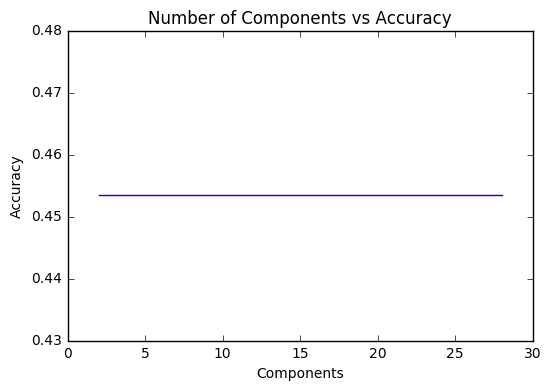

In [3]:
plt.plot(components,accuracies)
plt.title('Number of Components vs Accuracy')
plt.xlabel('Components')
plt.ylabel('Accuracy')
plt.show()